In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
import matplotlib.pyplot as plt

In [2]:
folder = r"C:\Users\ytxu\Documents\ArcGIS\Projects\GE6211SDH\Processed\202101\Node\Bus"
file_list = os.listdir(folder)
note_attr_files = [f for f in file_list if "NodeAttributes_" in f and ".csv" in f]
len(note_attr_files)


48

In [3]:
from collections import defaultdict
node_attr_data_list = {}
for f in note_attr_files:
    # print(f)
    df = pd.read_csv(os.path.join(folder, f)) 
    
    
    degree_sum = len(df['Degree'])
    degree_count = df['Degree'].value_counts().to_dict()
    df['Degree_Count'] = df['Degree'].apply(lambda x:degree_count[x])
    df['Degree_Freq'] = df['Degree_Count']/degree_sum
    df['LogDegreeCount'] = np.log10(df["Degree_Count"].replace(0, np.nan))
    df['LogDegreeFreq'] = np.log10(df["Degree_Freq"].replace(0, np.nan))
    df['LogDegree'] = np.log10(df["Degree"].replace(0, np.nan))
    
    in_degree_sum = len(df['indegree'])
    in_degree_count = df['indegree'].value_counts().to_dict()
    df['in_degree_count'] = df['indegree'].apply(lambda x:in_degree_count[x])
    df['in_degree_freq'] = df['in_degree_count']/in_degree_sum
    df['LogInDegreeCount'] = np.log10(df["in_degree_count"].replace(0, np.nan))
    df['LogInDegreeFreq'] = np.log10(df["in_degree_freq"].replace(0, np.nan))
    df['LogInDegree'] = np.log10(df["indegree"].replace(0, np.nan))
    
    out_degree_sum = len(df['outdegree'])
    out_degree_count = df['outdegree'].value_counts().to_dict()
    df['out_degree_count'] = df['outdegree'].apply(lambda x:out_degree_count[x])
    df['out_degree_freq'] = df['out_degree_count']/out_degree_sum
    df['LogOutDegreeCount'] = np.log10(df["out_degree_count"].replace(0, np.nan))
    df['LogOutDegreeFreq'] = np.log10(df["out_degree_freq"].replace(0, np.nan))
    df['LogOutDegree'] = np.log10(df["outdegree"].replace(0, np.nan))
    
    
    df['DayType'] = f.split("_")[2]
    df['DayHourInt'] = int(f.replace(".csv","").split("_")[-1])
    df['DayHourTxt'] = f.replace(".csv","").split("_")[-1]
    df_name = f.replace(".csv","")[15:]
    node_attr_data_list[df_name] = df
    #print(df.columns)

In [11]:
df.columns

Index(['Id', 'Label', 'timeset', 'indegree', 'outdegree', 'Degree',
       'weighted indegree', 'weighted outdegree', 'Weighted Degree',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'Authority', 'Hub', 'modularity_class',
       'pageranks', 'componentnumber', 'strongcompnum', 'clustering',
       'eigencentrality', 'Degree_Count', 'Degree_Freq', 'LogDegreeCount',
       'LogDegreeFreq', 'LogDegree', 'in_degree_count', 'in_degree_freq',
       'LogInDegreeCount', 'LogInDegreeFreq', 'LogInDegree',
       'out_degree_count', 'out_degree_freq', 'LogOutDegreeCount',
       'LogOutDegreeFreq', 'LogOutDegree', 'DayType', 'DayHourInt',
       'DayHourTxt'],
      dtype='object')

In [4]:
# merge df into one
degree_df = pd.DataFrame()
for df_name in node_attr_data_list.keys():
    degree_df=degree_df.append(node_attr_data_list[df_name],ignore_index=True)
    
weekday_df = degree_df[degree_df['DayType']=='WEEKDAY']
weekend_df = degree_df[degree_df['DayType']=='WEEKEND']

# remove null value from LogDegree

weekend_df = weekend_df[weekend_df['LogDegree'].notna()]
weekday_df = weekday_df[weekday_df['LogDegree'].notna()]

In [96]:
degree_df.shape

(116377, 27)

In [89]:
import scipy.stats as stats


In [5]:
all_df = weekday_df.append(weekend_df)
all_df.columns

Index(['Id', 'Label', 'timeset', 'indegree', 'outdegree', 'Degree',
       'weighted indegree', 'weighted outdegree', 'Weighted Degree',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'Authority', 'Hub', 'modularity_class',
       'pageranks', 'componentnumber', 'strongcompnum', 'clustering',
       'eigencentrality', 'Degree_Count', 'Degree_Freq', 'LogDegreeCount',
       'LogDegreeFreq', 'LogDegree', 'in_degree_count', 'in_degree_freq',
       'LogInDegreeCount', 'LogInDegreeFreq', 'LogInDegree',
       'out_degree_count', 'out_degree_freq', 'LogOutDegreeCount',
       'LogOutDegreeFreq', 'LogOutDegree', 'DayType', 'DayHourInt',
       'DayHourTxt'],
      dtype='object')

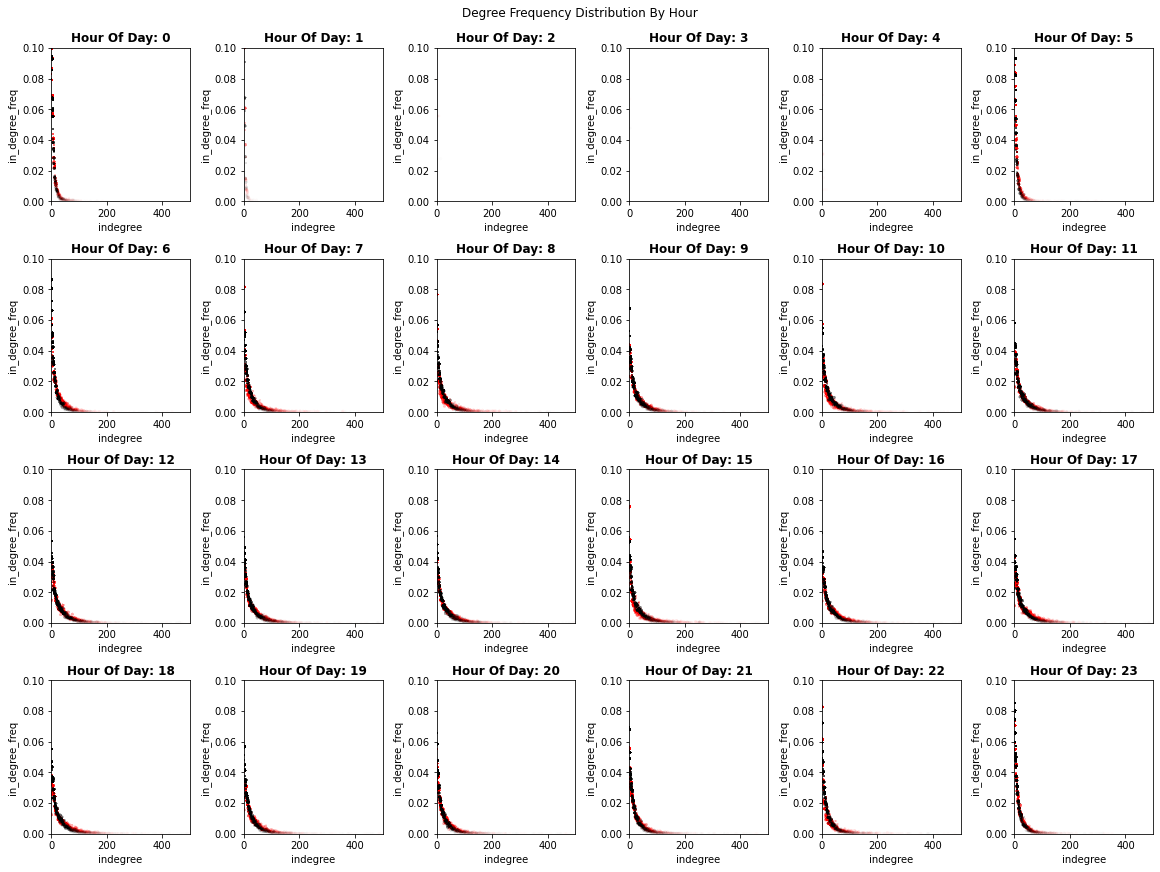

In [6]:
fig, axes = plt.subplots(4,6, figsize=(16,12), constrained_layout=True)
fig.suptitle('Degree Frequency Distribution By Hour', )

count = 0
color_dict = dict({'WEEKEND':'black',
                  'WEEKDAY':'red'})

while count < 24:
    
    x = count%6
    y = int(count/6)
    
    for day_type in ['WEEKDAY','WEEKEND']:
    
        sub_df = all_df[all_df['DayHourInt']==count]
        if count==5:
            legend=True
        else:
            legend=False
        
        # indegree
        sns.scatterplot(ax=axes[y][x],
                        x=sub_df[sub_df['DayType']==day_type]["indegree"], 
                        y=sub_df[sub_df['DayType']==day_type]["in_degree_freq"],
                        alpha=0.01, s=10,
                       hue=sub_df[sub_df['DayType']==day_type]["DayType"],palette=color_dict, marker='+',legend=False)
        # outdegree
        sns.scatterplot(ax=axes[y][x],
                        x=sub_df[sub_df['DayType']==day_type]["outdegree"], 
                        y=sub_df[sub_df['DayType']==day_type]["out_degree_freq"],
                        alpha=0.01, s=10,
                       hue=sub_df[sub_df['DayType']==day_type]["DayType"],palette=color_dict, legend=False)
        
        
    axes[y][x].set_title("Hour Of Day: " + str(count),fontweight="bold", size=12)
    axes[y][x].set_xlim([0, 500])
    axes[y][x].set_ylim([0, 0.1])
    count+=1   
#plt.legend(bbox_to_anchor=(1.01, 1.01))

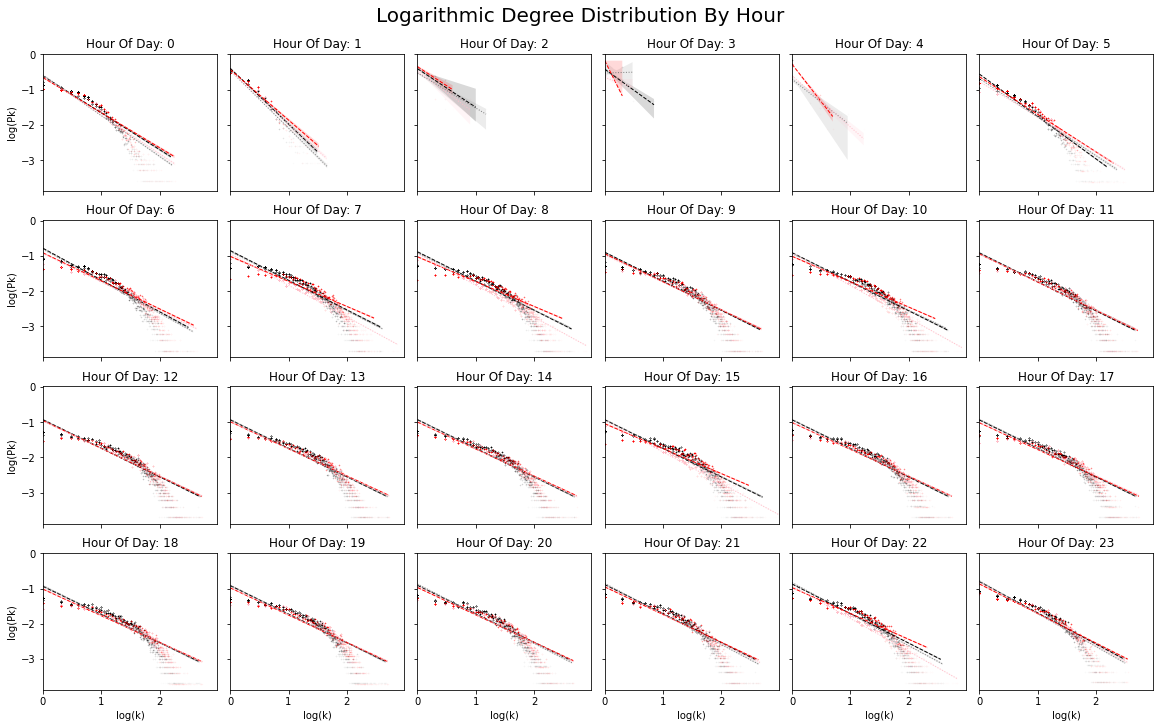

In [7]:
# Log Degree Frequency
fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Logarithmic Degree Distribution By Hour', fontsize=20)

count = 0
color_dict = dict({'WEEKEND':'black',
                  'WEEKDAY':'red'})

while count < 24:
    
    x = count%6
    y = int(count/6)
    sub_df = all_df[all_df['DayHourInt']==count]
        
    # weekend indegree
    sns.regplot(x=sub_df[sub_df['DayType']=='WEEKEND']['LogInDegree'],
                y=sub_df[sub_df['DayType']=='WEEKEND']['LogInDegreeFreq'], ax=axes[y][x],
            scatter_kws={'alpha':0.01,'s':1},line_kws={"lw":1,"ls":"--"}, color='black',label=False)
        
    # weekend outdegree
    sns.regplot(x=sub_df[sub_df['DayType']=='WEEKEND']['LogOutDegree'],
                y=sub_df[sub_df['DayType']=='WEEKEND']['LogOutDegreeFreq'], ax=axes[y][x],
            scatter_kws={'alpha':0.01,'s':1},line_kws={"lw":1,"ls":":"}, color='gray',label=False)

    # weekday indegree
    sns.regplot(x=sub_df[sub_df['DayType']=='WEEKDAY']['LogInDegree'],
                y=sub_df[sub_df['DayType']=='WEEKDAY']['LogInDegreeFreq'], ax=axes[y][x],
            scatter_kws={'alpha':0.01,'s':1},line_kws={"lw":1,"ls":"--"}, color='red',label=False)
        
    # weekday outdegree
    sns.regplot(x=sub_df[sub_df['DayType']=='WEEKDAY']['LogOutDegree'],
                y=sub_df[sub_df['DayType']=='WEEKDAY']['LogOutDegreeFreq'], ax=axes[y][x],
            scatter_kws={'alpha':0.01,'s':1},line_kws={"lw":1,"ls":":"}, color='pink',label=False)
    
    
        
    axes[y][x].set_title("Hour Of Day: " + str(count), size=12)
    
    if y==3:
        axes[y][x].set_xlabel("log(k)")
    else:
        axes[y][x].set_xlabel("")
    if x==0:
        axes[y][x].set_ylabel("log(Pk)")
    else:
        axes[y][x].set_ylabel("")
    count+=1   
#plt.legend(bbox_to_anchor=(1.01, 1.01))

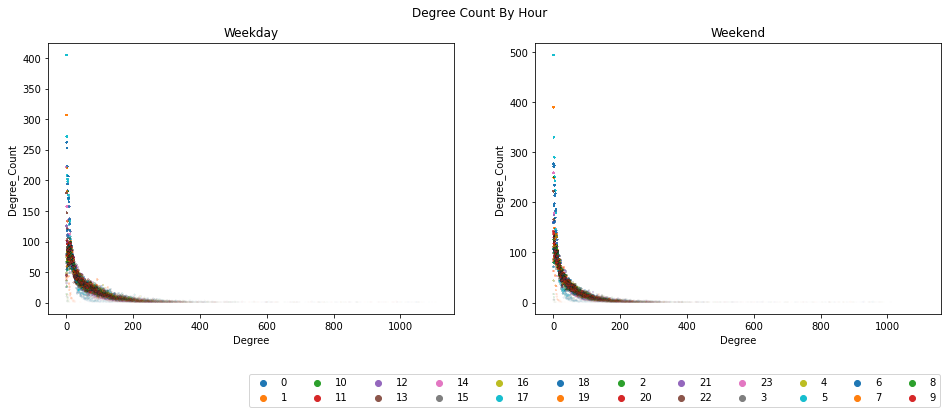

In [34]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,5))
fig.suptitle('Degree Count By Hour')

sns.scatterplot(ax=axes[0],x=weekday_df["Degree"], y=weekday_df["Degree_Count"],
                alpha=0.01, s=5,hue=weekday_df['DayHourTxt'],legend=False, palette='tab10')
axes[0].set_title("Weekday")

sns.scatterplot(ax=axes[1],x=weekend_df["Degree"], y=weekend_df["Degree_Count"],
                alpha=0.01, s=5, hue=weekend_df['DayHourTxt'], palette = 'tab10')
axes[1].set_title("Weekend")

plt.legend(bbox_to_anchor=(1.01, -0.2),ncol=12)
#plt.legend(bbox_to_anchor=(1.01, 1.01),borderaxespad=0)
#plt.tight_layout()

In [ ]:
# overall knn plot

# distribution of Degree vs KNN
fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('knn(k) vs k',fontweight="bold", size=20)

count = 0
for key in weekday_knn.keys():

    x = count%6
    y = int(count/6)
    dn = pd.DataFrame(list(weekday_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    dn_weekend = pd.DataFrame(list(weekend_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    
    dn['LogDegree'] = np.log10(dn["Degree"].replace(0, np.nan))
    dn['LogAvgDegreeKNN'] = np.log10(dn["AvgDegreeKNN"].replace(0, np.nan))
     
    dn_weekend['LogDegree'] = np.log10(dn_weekend["Degree"].replace(0, np.nan))
    dn_weekend['LogAvgDegreeKNN'] = np.log10(dn_weekend["AvgDegreeKNN"].replace(0, np.nan))

    # sns.scatterplot(data=dn, x="Degree",y="AvgDegreeKNN",ax=axes[y][x], alpha=0.05)
    axes[y][x].scatter(x=dn["Degree"], y=dn["AvgDegreeKNN"], alpha=0.1, color='r', s=5)
    axes[y][x].scatter(x=dn_weekend["Degree"], y=dn_weekend["AvgDegreeKNN"], alpha=0.1, color='k', s=5)
    axes[y][x].plot([0, 1], [0, 1], color='gray', transform=axes[y][x].transAxes, linestyle='--')  
    
    #grid = sns.lmplot(data=dn, x="Degree", y="AvgDegreeKNN", ax=axes[y][x])
    #grid.plot_joint(plt.scatter, color="g")
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    
    axes[y][x].set_title("Hour Of Day: " + str(key), size=12)
    axes[y][x].set_ylabel("knn(k)")
    axes[y][x].set_xlabel("k")

    count += 1    
    
plt.show()

In [33]:
new_df = weekend_df.append(weekday_df)

In [35]:
new_df.columns

Index(['Id', 'Label', 'timeset', 'indegree', 'outdegree', 'Degree',
       'weighted indegree', 'weighted outdegree', 'Weighted Degree',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'Authority', 'Hub', 'modularity_class',
       'pageranks', 'componentnumber', 'strongcompnum', 'clustering',
       'eigencentrality', 'Degree_Count', 'Degree_Freq', 'LogDegreeCount',
       'LogDegreeFreq', 'LogDegree', 'in_degree_count', 'in_degree_freq',
       'LogInDegreeCount', 'LogInDegreeFreq', 'LogInDegree',
       'out_degree_count', 'out_degree_freq', 'LogOutDegreeCount',
       'LogOutDegreeFreq', 'LogOutDegree', 'DayType', 'DayHourInt',
       'DayHourTxt'],
      dtype='object')

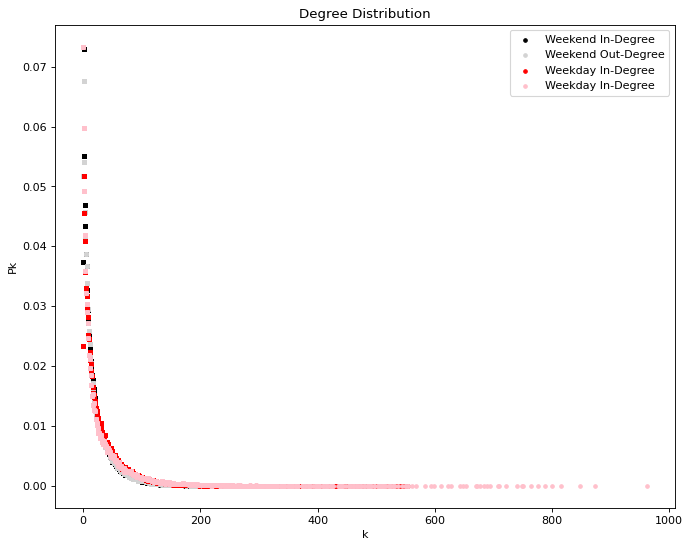

In [57]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['axes.facecolor'] = 'w'
ax1 = fig.add_subplot(111)

plt.title('Degree Distribution', fontweight=40)
#sns.scatterplot(x=new_df["Degree"], y=new_df["Degree_Freq"],alpha=0.01, 
#                hue=new_df['DayType'],size=0.001, style=new_df['DayType'],palette={'WEEKEND':'red',"WEEKDAY":'black'})

ax1.scatter(weekend_df['indegree'],weekend_df['in_degree_freq'], s=10, c='k', marker="o", 
            label='Weekend In-Degree', alpha=1)
ax1.scatter(weekend_df['outdegree'],weekend_df['out_degree_freq'], s=10, c='lightgray', marker="o", 
            label='Weekend Out-Degree', alpha=1)
ax1.scatter(weekday_df['indegree'],weekday_df['in_degree_freq'], s=10, c='red', marker="o", 
            label='Weekday In-Degree', alpha=1)
ax1.scatter(weekday_df['outdegree'],weekday_df['out_degree_freq'], s=10, c='pink', marker="o", 
            label='Weekday In-Degree', alpha=1)

ax1.set_xlabel("k")
ax1.set_ylabel("Pk")
ax1.legend()
plt.show()


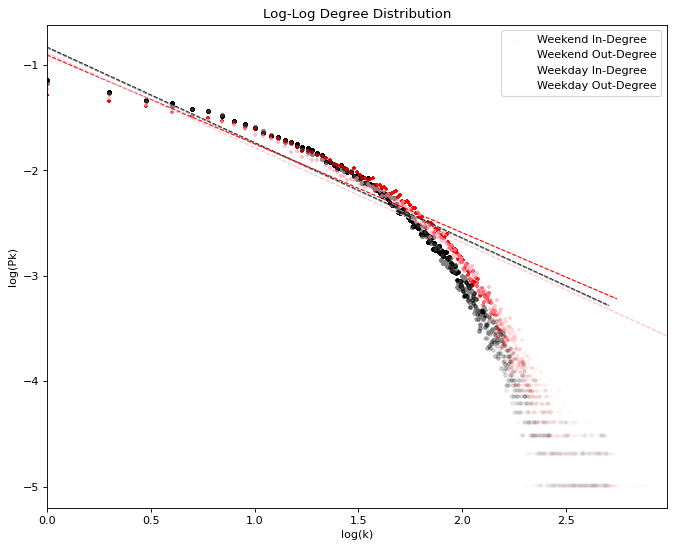

In [70]:
fig2 = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

plt.title('Log-Log Degree Distribution', fontweight=40)

# plot scatter plot
#ax2.scatter(weekend_df['LogInDegree'],weekend_df['LogInDegreeFreq'], s=10, c='k', marker="o", 
#           label='Weekend In-Degree', alpha=0.01)
#ax2.scatter(weekend_df['LogOutDegree'],weekend_df['LogOutDegreeFreq'], s=10, c='lightgray', marker="o", 
#            label='Weekend Out-Degree', alpha=0.01)
#ax2.scatter(weekday_df['LogInDegree'],weekday_df['LogInDegreeFreq'], s=10, c='red', marker="o", 
#            label='Weekday In-Degree', alpha=0.01)
#ax2.scatter(weekday_df['LogOutDegree'],weekday_df['LogOutDegreeFreq'], s=10, c='pink', marker="o", 
#            label='Weekday In-Degree', alpha=0.01)
sns.regplot(x=weekend_df['LogInDegree'],y=weekend_df['LogInDegreeFreq'], ax=ax2,color='k',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"},label='Weekend In-Degree')
sns.regplot(x=weekend_df['LogOutDegree'],y=weekend_df['LogOutDegreeFreq'], ax=ax2, color='gray',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"}, label='Weekend Out-Degree')

sns.regplot(x=weekday_df['LogInDegree'],y=weekday_df['LogInDegreeFreq'], ax=ax2,color='r', marker='+',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"}, label='Weekday In-Degree')
sns.regplot(x=weekday_df['LogOutDegree'],y=weekday_df['LogOutDegreeFreq'], ax=ax2, color='pink', marker='+',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"}, label='Weekday Out-Degree')

ax2.set_xlabel("log(k)")
ax2.set_ylabel("log(Pk)")
ax2.legend()
plt.show()

In [20]:
# get the regression formula
from scipy import stats

count = 0
while count < 24:
    
    x = count%6
    y = int(count/6)
    
    sub_df = all_df[(all_df['DayHourInt']==count) & (all_df['DayType']=='WEEKDAY')]
    mask = ~np.isnan(sub_df['LogInDegree']) & ~np.isnan(sub_df['LogInDegreeFreq'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(sub_df['LogInDegree'][mask], 
                                                               sub_df['LogInDegreeFreq'][mask])
    
    # use line_kws to set line label for legend
    print("{0}|Weekday in-degree|{1:.5f}|{2:.5f}".format(count, slope, intercept))
    
    mask = ~np.isnan(sub_df['LogOutDegree']) & ~np.isnan(sub_df['LogOutDegreeFreq'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(sub_df['LogOutDegree'][mask], 
                                                               sub_df['LogOutDegreeFreq'][mask])
    
    # use line_kws to set line label for legend
    print("{0}|Weekday out-degree|{1:.5f}|{2:.5f}".format(count,slope,intercept))
    
    sub_df = all_df[(all_df['DayHourInt']==count) & (all_df['DayType']=='WEEKEND')]
    mask = ~np.isnan(sub_df['LogInDegree']) & ~np.isnan(sub_df['LogInDegreeFreq'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(sub_df['LogInDegree'][mask], 
                                                               sub_df['LogInDegreeFreq'][mask])
    # use line_kws to set line label for legend
    print("{0}|Weekend in-degree|{1:.5f}|{2:.5f}".format(count,slope,intercept))
    
    mask = ~np.isnan(sub_df['LogOutDegree']) & ~np.isnan(sub_df['LogOutDegreeFreq'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(sub_df['LogOutDegree'][mask], 
                                                               sub_df['LogOutDegreeFreq'][mask])
    # use line_kws to set line label for legend
    print("{0}|Weekend out-degree|{1:.5f}|{2:.5f}".format(count,slope,intercept))
    
    count += 1

0|Weekday in-degree|-0.99414|-0.65670
0|Weekday out-degree|-1.10146|-0.61444
0|Weekend in-degree|-1.04357|-0.61255
0|Weekend out-degree|-1.15543|-0.58043
1|Weekday in-degree|-1.43246|-0.42868
1|Weekday out-degree|-1.49902|-0.46845
1|Weekend in-degree|-1.58010|-0.39264
1|Weekend out-degree|-1.63708|-0.45424
2|Weekday in-degree|-1.07738|-0.34735
2|Weekday out-degree|-1.21746|-0.47010
2|Weekend in-degree|-1.09581|-0.40393
2|Weekend out-degree|-0.99505|-0.52414
3|Weekday in-degree|-3.32193|-0.17609
3|Weekday out-degree|-0.58748|-0.65130
3|Weekend in-degree|-1.19438|-0.41862
3|Weekend out-degree|0.05063|-0.52744
4|Weekday in-degree|-2.12308|-0.27637
4|Weekday out-degree|-1.45620|-0.60046
4|Weekend in-degree|nan|nan
4|Weekend out-degree|-1.31152|-0.70066
5|Weekday in-degree|-1.06601|-0.63011
5|Weekday out-degree|-1.00082|-0.76802
5|Weekend in-degree|-1.20265|-0.55538
5|Weekend out-degree|-1.09219|-0.68451
6|Weekday in-degree|-0.79414|-0.91202
6|Weekday out-degree|-0.80861|-0.93133
6|Weekend 

C:\Users\ytxu\AppData\Local\ESRI\conda\envs\ge6211\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\ytxu\AppData\Local\ESRI\conda\envs\ge6211\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)



6|Weekend out-degree|-0.90917|-0.80638
7|Weekday in-degree|-0.70986|-1.01106
7|Weekday out-degree|-0.89713|-0.93575
7|Weekend in-degree|-0.84087|-0.84803
7|Weekend out-degree|-0.84055|-0.87177
8|Weekday in-degree|-0.70365|-1.02378
8|Weekday out-degree|-0.90272|-0.92943
8|Weekend in-degree|-0.82819|-0.88193
8|Weekend out-degree|-0.80774|-0.91747
9|Weekday in-degree|-0.79529|-0.93778
9|Weekday out-degree|-0.77314|-0.97428
9|Weekend in-degree|-0.82379|-0.89454
9|Weekend out-degree|-0.80020|-0.93165
10|Weekday in-degree|-0.71995|-1.00844
10|Weekday out-degree|-0.92051|-0.91776
10|Weekend in-degree|-0.82273|-0.90779
10|Weekend out-degree|-0.80156|-0.93053
11|Weekday in-degree|-0.79881|-0.94138
11|Weekday out-degree|-0.79129|-0.94758
11|Weekend in-degree|-0.82236|-0.91060
11|Weekend out-degree|-0.79965|-0.92680
12|Weekday in-degree|-0.78812|-0.95371
12|Weekday out-degree|-0.77771|-0.96593
12|Weekend in-degree|-0.81035|-0.92689
12|Weekend out-degree|-0.79831|-0.93137
13|Weekday in-degree|-0.

In [ ]:
## Backup
# plot Weekend in-degree fit line
z1 = np.polyfit(weekend_df["LogInDegree"], weekend_df["LogInDegreeFreq"], 1)
p1 = np.poly1d(z1)(weekend_df["LogInDegree"])
ax2.plot(weekend_df["LogInDegree"],p1,"k:", lw=2, alpha=0.5)

# plot weekday fit line
z2 = np.polyfit(weekday_df["LogOutDegree"], weekday_df["LogOutDegreeFreq"], 1)
p2 = np.poly1d(z2)(weekday_df["LogOutDegree"])
ax2.plot(weekday_df["LogOutDegree"],p2,"r:", lw=2, alpha=0.5)

# plot Weekend fit line
z3 = np.polyfit(weekend_df["LogInDegree"], weekend_df["LogInDegreeFreq"], 1)
p3 = np.poly1d(z3)(weekend_Df["LogInDegree"])
ax2.plot(weekend_df["LogInDegree"],p3,"k--", lw=2, alpha=0.5)

# plot weekday fit line
z4 = np.polyfit(weekday_df["LogOutDegree"], weekday_df["LogOutDegreeFreq"], 1)
p4 = np.poly1d(z4)(weekday_df["LogOutDegree"])
ax2.plot(nweekday_df["LogOutDegree"],p4,"r:", lw=2, alpha=0.5)

In [114]:
new_df = weekday_df.append(weekend_df)
new_df.head()

Id  Label  timeset  indegree  outdegree  Degree  weighted indegree  \
0  72059    NaN      NaN         5          8      13                  7   
1  84489    NaN      NaN        21         25      46                 43   
2  77209    NaN      NaN        21         10      31                 49   
3  76231    NaN      NaN        45         26      71                113   
4  76101    NaN      NaN        73         55     128                375   

   weighted outdegree  Weighted Degree  Eccentricity  ...  strongcompnum  \
0                  12               19             9  ...          405.0   
1                  69              112             8  ...          405.0   
2                  25               74             8  ...          405.0   
3                 126              239             8  ...          405.0   
4                 377              752             8  ...          405.0   

   clustering  eigencentrality  Degree_Count  LogDegreeCount  LogDegree  \
0    0.064103         0.008021           100        2.000000   1.113943   
1    0.070048         0.100149            21        1.322219   1.662758   
2    0.095699         0.175083            32        1.505150   1.491362   
3    0.098793         0.387075             4        0.602060   1.851258   
4    0.069267         0.518470             2        0.301030   2.107210   

   DayType  DayHourInt  DayHourTxt  DayDegreeCount  
0  WEEKDAY           0           0            1632  
1  WEEKDAY           0           0             601  
2  WEEKDAY           0           0             803  
3  WEEKDAY           0           0             397  
4  WEEKDAY           0           0             194  

[5 rows x 28 columns]

In [141]:
# take log Day Degree Count
new_df['LogDayDegreeCount'] = np.log10(new_df["DayDegreeCount"].replace(0, np.nan))
new_df.head()

Id  Label  timeset  indegree  outdegree  Degree  weighted indegree  \
98010  72059    NaN      NaN         2          5       7                  5   
98011  84489    NaN      NaN        13         17      30                 22   
98012  77021    NaN      NaN        18         17      35                 75   
98013  84009    NaN      NaN       156        101     257                546   
98014  84459    NaN      NaN         8          5      13                  9   

       weighted outdegree  Weighted Degree  Eccentricity  ...  clustering  \
98010                   6               11             8  ...    0.142857   
98011                  47               69             8  ...    0.073563   
98012                  38              113             8  ...    0.157143   
98013                1616             2162             7  ...    0.026954   
98014                  17               26             7  ...    0.153846   

       eigencentrality  Degree_Count  LogDegreeCount  LogDegree  DayType  \
98010         0.003486           183        2.262451   0.845098  WEEKEND   
98011         0.082525            30        1.477121   1.477121  WEEKEND   
98012         0.204461            23        1.361728   1.544068  WEEKEND   
98013         0.888832             1        0.000000   2.409933  WEEKEND   
98014         0.043078           102        2.008600   1.113943  WEEKEND   

       DayHourInt  DayHourTxt  DayDegreeCount  LogDayDegreeCount  
98010           0           0            2173           3.337060  
98011           0           0             942           2.974051  
98012           0           0             789           2.897077  
98013           0           0              19           1.278754  
98014           0           0            1763           3.246252  

[5 rows x 29 columns]

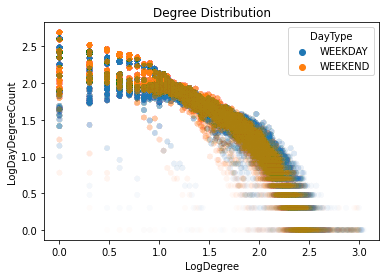

In [117]:
plt.title('Degree Distribution')
sns.scatterplot(x=new_df["LogDegree"], y=new_df["LogDayDegreeCount"],alpha=0.01, hue=new_df['DayHourInt'])
plt.show()

In [92]:
day_cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

C:\Users\ytxu\AppData\Local\ESRI\conda\envs\ge6211\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ytxu\AppData\Local\ESRI\conda\envs\ge6211\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


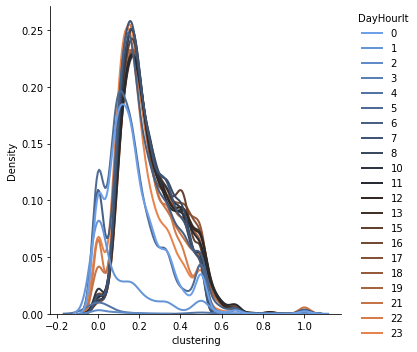

In [95]:
sns.displot(degree_df, x="clustering", hue='DayHourIt', kind='kde',palette=day_cmap,alpha=0.5,linewidth=2)

# Create Graphs for Every Hour and Day Type

In [5]:
import networkx as nx
import os
from collections import defaultdict

In [6]:
input_data_folder = r"C:\Users\ytxu\Documents\ArcGIS\Projects\GE6211SDH\Processed\202101\Edge\Bus"
file_list = os.listdir(input_data_folder)
edgelist_list = [f for f in file_list if ".edgelist" in f]

graph_dict = defaultdict(nx.DiGraph)

for edgelist_filename in edgelist_list:
    #print(edgelist_filename)

    year_month = edgelist_filename.split("_")[1]
    day_type = edgelist_filename.split("_")[2]
    hour = edgelist_filename.split("_")[-1].split(".")[0]  # in text

    graph_name = "{}_{}_{}".format(year_month, day_type, hour)

    edge_list = os.path.join(input_data_folder, edgelist_filename)
    if not os.path.exists(edge_list):
        continue

    new_graph = nx.read_weighted_edgelist(edge_list)
    graph_dict[graph_name] = new_graph

In [7]:
knn_dict = {}
degree_dict = {}

for graph in graph_dict.keys():
    print(graph)
    knn_dict[graph] = nx.k_nearest_neighbors(graph_dict[graph], weight='weight')
    degree_dict[graph] = {(x):y for (x,y) in graph_dict[graph].degree(weight='weight')}

    

202101_WEEKDAY_0
202101_WEEKDAY_1
202101_WEEKDAY_10
202101_WEEKDAY_11
202101_WEEKDAY_12
202101_WEEKDAY_13
202101_WEEKDAY_14
202101_WEEKDAY_15
202101_WEEKDAY_16
202101_WEEKDAY_17
202101_WEEKDAY_18
202101_WEEKDAY_19
202101_WEEKDAY_2
202101_WEEKDAY_20
202101_WEEKDAY_21
202101_WEEKDAY_22
202101_WEEKDAY_23
202101_WEEKDAY_3
202101_WEEKDAY_4
202101_WEEKDAY_5
202101_WEEKDAY_6
202101_WEEKDAY_7
202101_WEEKDAY_8
202101_WEEKDAY_9
202101_WEEKENDSHOLIDAY_0
202101_WEEKENDSHOLIDAY_1
202101_WEEKENDSHOLIDAY_10
202101_WEEKENDSHOLIDAY_11
202101_WEEKENDSHOLIDAY_12
202101_WEEKENDSHOLIDAY_13
202101_WEEKENDSHOLIDAY_14
202101_WEEKENDSHOLIDAY_15
202101_WEEKENDSHOLIDAY_16
202101_WEEKENDSHOLIDAY_17
202101_WEEKENDSHOLIDAY_18
202101_WEEKENDSHOLIDAY_19
202101_WEEKENDSHOLIDAY_2
202101_WEEKENDSHOLIDAY_20
202101_WEEKENDSHOLIDAY_21
202101_WEEKENDSHOLIDAY_22
202101_WEEKENDSHOLIDAY_23
202101_WEEKENDSHOLIDAY_3
202101_WEEKENDSHOLIDAY_4
202101_WEEKENDSHOLIDAY_5
202101_WEEKENDSHOLIDAY_6
202101_WEEKENDSHOLIDAY_7
202101_WEEKEND

In [9]:
print(knn_dict)

{'202101_WEEKDAY_0': {13: 59.98352124891587, 46: 56.0481360839667, 31: 66.70334346504559, 71: 52.78740157480315, 128: 28.18381706244503, 60: 37.47435190292333, 30: 62.39753879079722, 19: 62.94187317784257, 64: 52.684630738522955, 11: 74.6234158117079, 25: 66.2674640318946, 44: 61.132501948558065, 35: 51.069488817891376, 12: 69.06636191677175, 43: 59.05016286644951, 10: 79.27539856205064, 266: 32.96507936507936, 18: 70.18953371351895, 48: 62.7250378214826, 15: 65.58871265215788, 5: 82.43049568965517, 17: 64.68568524970964, 23: 62.938349954669086, 111: 69.68, 2: 89.32401862940785, 20: 59.990944123314065, 24: 51.27137076378351, 114: 62.31203007518797, 98: 45.96937573616019, 246: 23.53890123848841, 70: 39.91978122151322, 100: 60.6261319534282, 7: 111.19354838709677, 53: 62.41617819460727, 9: 77.63523131672598, 67: 54.90239762359431, 103: 80.63163371488034, 56: 58.04550379198267, 66: 50.15381337878142, 29: 49.93595757699368, 36: 53.82254863040889, 21: 71.28794326241135, 237: 27.047967108268

In [10]:
print(degree_dict)

{'202101_WEEKDAY_0': {'72059': 19.0, '84489': 112.0, '77209': 74.0, '76231': 239.0, '76101': 752.0, '84471': 241.0, '75231': 96.0, '96269': 37.0, '77339': 224.0, '84631': 38.0, '84309': 92.0, '84539': 158.0, '75251': 162.0, '84621': 84.0, '84529': 159.0, '84611': 17.0, '75351': 152.0, '75311': 13.0, '84009': 2205.0, '77199': 46.0, '84219': 223.0, '75061': 19.0, '75401': 12.0, '84459': 58.0, '75371': 13.0, '84361': 168.0, '77279': 74.0, '75051': 700.0, '77269': 15.0, '77219': 30.0, '77259': 31.0, '75411': 3.0, '78219': 235.0, '76189': 118.0, '76239': 596.0, '76179': 44.0, '76149': 180.0, '76051': 326.0, '75009': 3149.0, '76039': 470.0, '76249': 449.0, '76159': 16.0, '76139': 222.0, '76409': 14.0, '76169': 32.0, '76199': 476.0, '60121': 658.0, '63361': 238.0, '60261': 310.0, '61041': 32.0, '66361': 58.0, '72071': 182.0, '53381': 320.0, '71121': 74.0, '70191': 135.0, '71161': 75.0, '62111': 57.0, '61011': 39.0, '52009': 2189.0, '64351': 220.0, '70101': 71.0, '70171': 424.0, '84451': 91.0,

In [11]:
# split dict to weekend vs weekday
weekday_knn = {}
weekend_knn = {}

for key in knn_dict.keys():
    
    day_type = key.split("_")[1]
    day_hour = int(key.split("_")[-1])
    
    if day_type=="WEEKDAY":
        weekday_knn[day_hour] = knn_dict[key]
    else:
        weekend_knn[day_hour] = knn_dict[key]
        
weekday_knn = dict(sorted(weekday_knn.items()))
weekend_knn = dict(sorted(weekend_knn.items()))

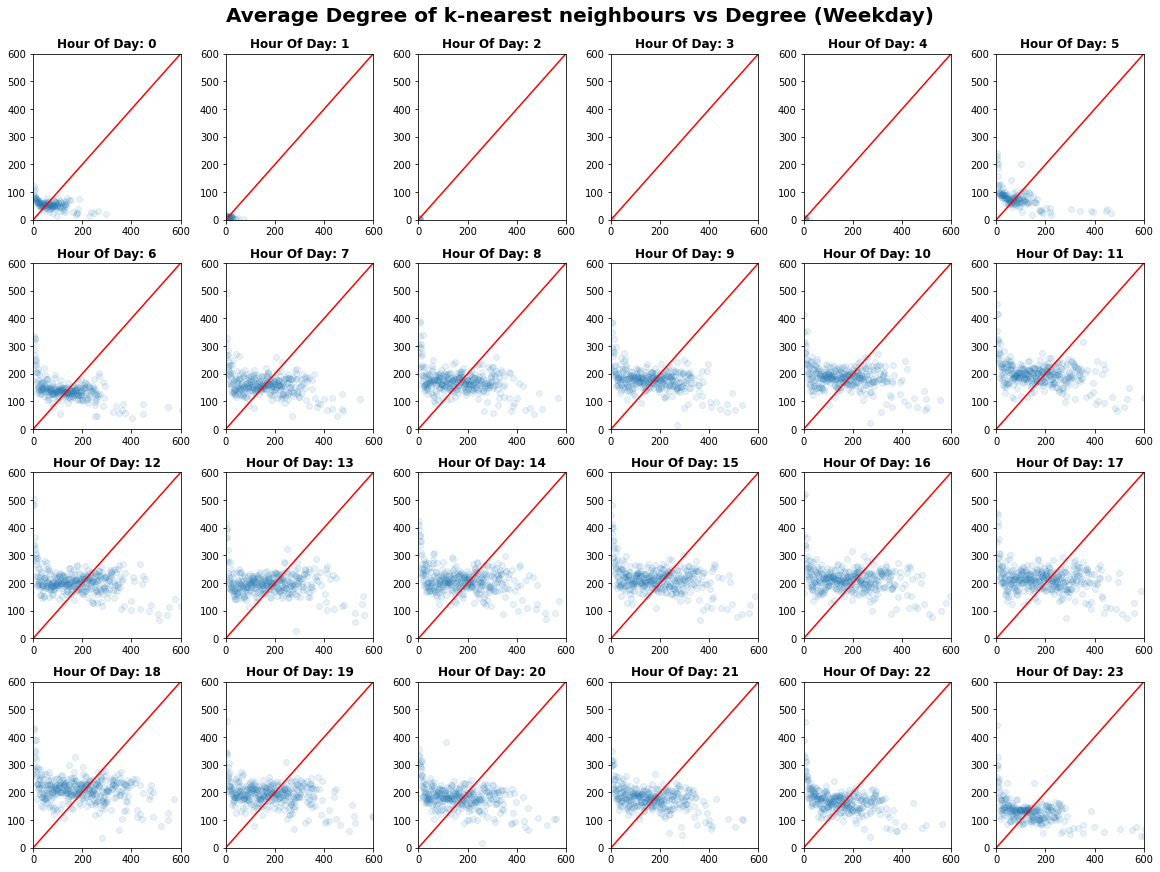

In [12]:
# distribution of Degree vs KNN
fig, axes = plt.subplots(4,6, figsize=(16,12), constrained_layout=True)
fig.suptitle('Average Degree of k-nearest neighbours vs Degree (Weekday)',fontweight="bold", size=20)

count = 0
for key in weekday_knn.keys():

    x = count%6
    y = int(count/6)
    dn = pd.DataFrame(list(weekday_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    dn['LogDegree'] = np.log10(dn["Degree"].replace(0, np.nan))
    dn['LogAvgDegreeKNN'] = np.log10(dn["AvgDegreeKNN"].replace(0, np.nan))

    # sns.scatterplot(data=dn, x="Degree",y="AvgDegreeKNN",ax=axes[y][x], alpha=0.05)
    axes[y][x].scatter(x=dn["Degree"], y=dn["AvgDegreeKNN"], alpha=0.1)
    axes[y][x].plot([0, 1], [0, 1], color='red', transform=axes[y][x].transAxes)  
    
    #grid = sns.lmplot(data=dn, x="Degree", y="AvgDegreeKNN", ax=axes[y][x])
    #grid.plot_joint(plt.scatter, color="g")
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    
    axes[y][x].set_title("Hour Of Day: " + str(key),fontweight="bold", size=12)
    axes[y][x].set_xlim([0, 600])
    axes[y][x].set_ylim([0, 600])

    count += 1    
    
plt.show()

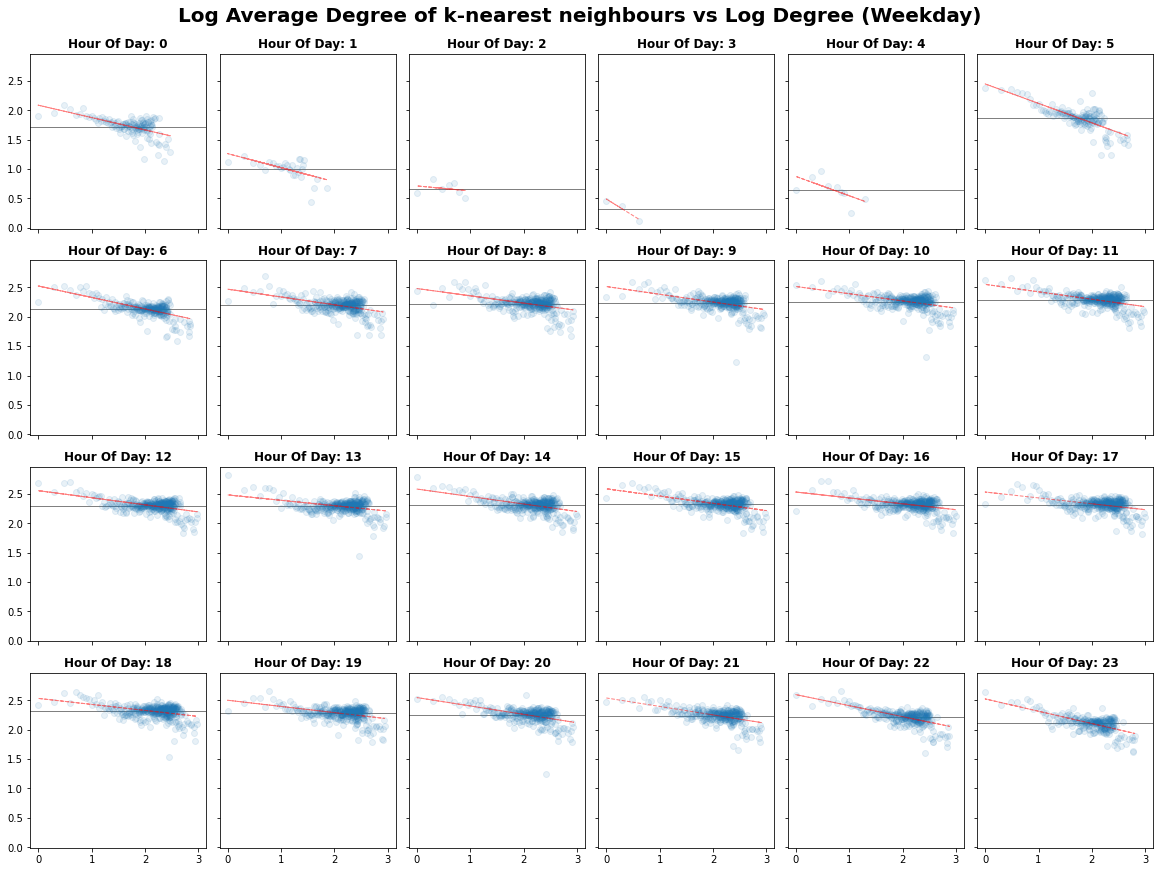

In [29]:
# distribution of Degree vs KNN
fig, axes = plt.subplots(4,6, figsize=(16,12), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Log Average Degree of k-nearest neighbours vs Log Degree (Weekday)',fontweight="bold", size=20)

count = 0
for key in weekday_knn.keys():

    x = count%6
    y = int(count/6)
    dn = pd.DataFrame(list(weekday_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    dn['LogDegree'] = np.log10(dn["Degree"].replace(0, np.nan))
    dn['LogAvgDegreeKNN'] = np.log10(dn["AvgDegreeKNN"].replace(0, np.nan))

    # sns.scatterplot(data=dn, x="Degree",y="AvgDegreeKNN",ax=axes[y][x], alpha=0.05)
    axes[y][x].scatter(x=dn["LogDegree"], y=dn["LogAvgDegreeKNN"], alpha=0.1)
    axes[y][x].axhline(y=np.mean(dn['LogAvgDegreeKNN']),xmin=0,xmax=3,c="gray",linewidth=1,zorder=0)
    
    z = np.polyfit(dn["LogDegree"], dn["LogAvgDegreeKNN"], 1)
    p = np.poly1d(z)(dn["LogDegree"])
    axes[y][x].plot(dn["LogDegree"],p,"r--", lw=1, alpha=0.5)
 
    
    #grid = sns.lmplot(data=dn, x="Degree", y="AvgDegreeKNN", ax=axes[y][x])
    #grid.plot_joint(plt.scatter, color="g")
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    
    axes[y][x].set_title("Hour Of Day: " + str(key),fontweight="bold", size=12)
    #axes[y][x].set_xlim([0, 3])
    #axes[y][x].set_ylim([0, 3])

    count += 1    
    
plt.show()

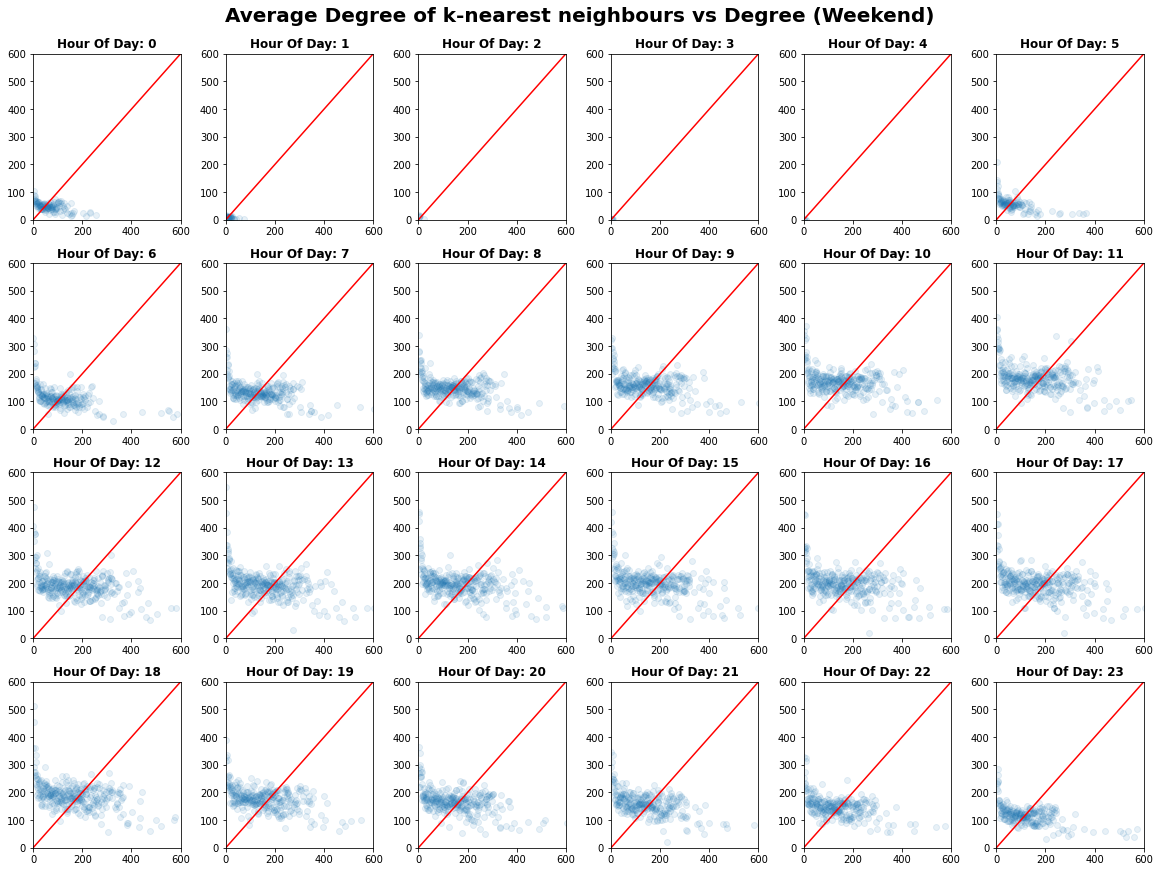

In [54]:
# distribution of Degree vs KNN
fig, axes = plt.subplots(4,6, figsize=(16,12), constrained_layout=True)
fig.suptitle('Average Degree of k-nearest neighbours vs Degree (Weekend)',fontweight="bold", size=20)

count = 0
for key in weekend_knn.keys():

    x = count%6
    y = int(count/6)
    dn = pd.DataFrame(list(weekend_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 

    # sns.scatterplot(data=dn, x="Degree",y="AvgDegreeKNN",ax=axes[y][x], alpha=0.05)
    axes[y][x].scatter(x=dn["Degree"], y=dn["AvgDegreeKNN"], alpha=0.1)
    axes[y][x].plot([0, 1], [0, 1], color='red', transform=axes[y][x].transAxes)  
    
    #grid = sns.lmplot(data=dn, x="Degree", y="AvgDegreeKNN", ax=axes[y][x])
    #grid.plot_joint(plt.scatter, color="g")
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    
    axes[y][x].set_title("Hour Of Day: " + str(key),fontweight="bold", size=12)
    axes[y][x].set_xlim([0, 600])
    axes[y][x].set_ylim([0, 600])

    count += 1    
    
plt.show()

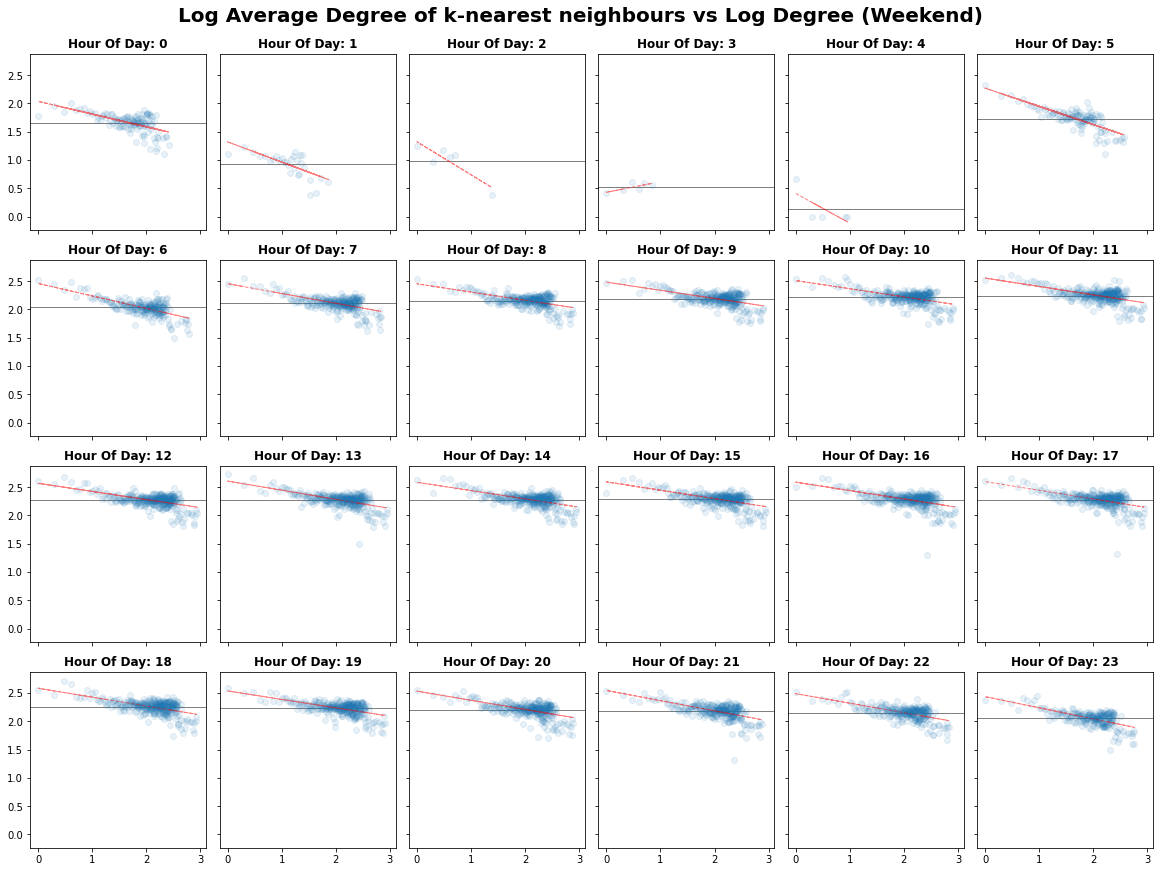

In [30]:
# distribution of Degree vs KNN
fig, axes = plt.subplots(4,6, figsize=(16,12), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Log Average Degree of k-nearest neighbours vs Log Degree (Weekend)',fontweight="bold", size=20)

count = 0
for key in weekend_knn.keys():

    x = count%6
    y = int(count/6)
    dn = pd.DataFrame(list(weekend_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    dn['LogDegree'] = np.log10(dn["Degree"].replace(0, np.nan))
    dn['LogAvgDegreeKNN'] = np.log10(dn["AvgDegreeKNN"].replace(0, np.nan))

    # sns.scatterplot(data=dn, x="Degree",y="AvgDegreeKNN",ax=axes[y][x], alpha=0.05)
    axes[y][x].scatter(x=dn["LogDegree"], y=dn["LogAvgDegreeKNN"], alpha=0.1)
    axes[y][x].axhline(y=np.mean(dn['LogAvgDegreeKNN']),xmin=0,xmax=3,c="gray",linewidth=1,zorder=0)
    
    z = np.polyfit(dn["LogDegree"], dn["LogAvgDegreeKNN"], 1)
    p = np.poly1d(z)(dn["LogDegree"])
    axes[y][x].plot(dn["LogDegree"],p,"r--", lw=1, alpha=0.5)
 
    
    #grid = sns.lmplot(data=dn, x="Degree", y="AvgDegreeKNN", ax=axes[y][x])
    #grid.plot_joint(plt.scatter, color="g")
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    
    axes[y][x].set_title("Hour Of Day: " + str(key),fontweight="bold", size=12)
    #axes[y][x].set_xlim([0, 3])
    #axes[y][x].set_ylim([0, 3])

    count += 1    
    
plt.show()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# plot average degree of knn and degree
#fig, axes = plt.subplots(12, 4, sharex=True, figsize=(16,30))
#fig.suptitle('K-nearest neighbour average degree')

count = 0
for graph in graph_dict.keys():
    print(graph_degree)
    break
    graph_knn = knn_dict[graph]
    graph_degree = degree_dict[graph]
    print(graph_degree)
    break
    dn = pd.DataFrame({'Degree':pd.Series(graph_degree),'AvgDegKNN':pd.Series(graph_knn)})
    print(dn.head())
    break
    x = count%4
    y = int(count/4)
    
    sns.scatterplot(data=dn, x="Degree", y="AvgDegKNN", ax=axes[y][x])
    axes[y][x].set_title(graph)
    count += 1    

{72059: 19.0, 84489: 112.0, 77209: 74.0, 76231: 239.0, 76101: 752.0, 84471: 241.0, 75231: 96.0, 96269: 37.0, 77339: 224.0, 84631: 38.0, 84309: 92.0, 84539: 158.0, 75251: 162.0, 84621: 84.0, 84529: 159.0, 84611: 17.0, 75351: 152.0, 75311: 13.0, 84009: 2205.0, 77199: 46.0, 84219: 223.0, 75061: 19.0, 75401: 12.0, 84459: 58.0, 75371: 13.0, 84361: 168.0, 77279: 74.0, 75051: 700.0, 77269: 15.0, 77219: 30.0, 77259: 31.0, 75411: 3.0, 78219: 235.0, 76189: 118.0, 76239: 596.0, 76179: 44.0, 76149: 180.0, 76051: 326.0, 75009: 3149.0, 76039: 470.0, 76249: 449.0, 76159: 16.0, 76139: 222.0, 76409: 14.0, 76169: 32.0, 76199: 476.0, 60121: 658.0, 63361: 238.0, 60261: 310.0, 61041: 32.0, 66361: 58.0, 72071: 182.0, 53381: 320.0, 71121: 74.0, 70191: 135.0, 71161: 75.0, 62111: 57.0, 61011: 39.0, 52009: 2189.0, 64351: 220.0, 70101: 71.0, 70171: 424.0, 84451: 91.0, 66371: 636.0, 60161: 313.0, 71151: 13.0, 80239: 43.0, 62131: 416.0, 54031: 117.0, 52039: 46.0, 75241: 55.0, 53371: 153.0, 70111: 91.0, 64031: 162.

# Plot Joint Degree Distribution through Graphs

In [32]:
graph_dict.keys()

dict_keys(['202101_WEEKDAY_0', '202101_WEEKDAY_1', '202101_WEEKDAY_10', '202101_WEEKDAY_11', '202101_WEEKDAY_12', '202101_WEEKDAY_13', '202101_WEEKDAY_14', '202101_WEEKDAY_15', '202101_WEEKDAY_16', '202101_WEEKDAY_17', '202101_WEEKDAY_18', '202101_WEEKDAY_19', '202101_WEEKDAY_2', '202101_WEEKDAY_20', '202101_WEEKDAY_21', '202101_WEEKDAY_22', '202101_WEEKDAY_23', '202101_WEEKDAY_3', '202101_WEEKDAY_4', '202101_WEEKDAY_5', '202101_WEEKDAY_6', '202101_WEEKDAY_7', '202101_WEEKDAY_8', '202101_WEEKDAY_9', '202101_WEEKENDSHOLIDAY_0', '202101_WEEKENDSHOLIDAY_1', '202101_WEEKENDSHOLIDAY_10', '202101_WEEKENDSHOLIDAY_11', '202101_WEEKENDSHOLIDAY_12', '202101_WEEKENDSHOLIDAY_13', '202101_WEEKENDSHOLIDAY_14', '202101_WEEKENDSHOLIDAY_15', '202101_WEEKENDSHOLIDAY_16', '202101_WEEKENDSHOLIDAY_17', '202101_WEEKENDSHOLIDAY_18', '202101_WEEKENDSHOLIDAY_19', '202101_WEEKENDSHOLIDAY_2', '202101_WEEKENDSHOLIDAY_20', '202101_WEEKENDSHOLIDAY_21', '202101_WEEKENDSHOLIDAY_22', '202101_WEEKENDSHOLIDAY_23', '2021

In [49]:
weekday_graph = dict(sorted({int(graph.split("_")[-1]):graph_dict[graph] for graph in graph_dict.keys() if "WEEKDAY" in graph}.items()))
weekend_graph = dict(sorted({int(graph.split("_")[-1]):graph_dict[graph] for graph in graph_dict.keys() if "WEEKEND" in graph}.items()))

In [50]:
weekday_graph.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [62]:
# get joint distribution df: SourceDegree, DestDegree
weekday_joint_degree_dist_df = {}
for day_hour in weekday_graph.keys():
    
    G = weekday_graph[day_hour]
    
    source_dest_degree = {'SourceDegree':[], 'DestDegree':[]}
    
    edge_list = G.edges()
    for edge in edge_list:
        source_node = edge[0]
        dest_node = edge[1]
        
        source_dest_degree['SourceDegree'].append(G.degree[source_node])
        source_dest_degree['DestDegree'].append(G.degree[dest_node])
       
        
    weekday_joint_degree_dist_df[day_hour] = pd.DataFrame(source_dest_degree)

len(weekday_joint_degree_dist_df)

24

In [55]:
# get joint distribution df: SourceDegree, DestDegree
weekend_joint_degree_dist_df = {}
for day_hour in weekend_graph.keys():
    
    G = weekend_graph[day_hour]
    
    source_dest_degree = {'SourceDegree':[], 'DestDegree':[]}
    
    edge_list = G.edges()
    for edge in edge_list:
        source_node = edge[0]
        dest_node = edge[1]
        
        source_dest_degree['SourceDegree'].append(G.degree[source_node])
        source_dest_degree['DestDegree'].append(G.degree[dest_node])
        
        
    weekend_joint_degree_dist_df[day_hour] = pd.DataFrame(source_dest_degree)

len(weekend_joint_degree_dist_df)

24

In [ ]:
fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Joint Degree Distribution (Weekday) - scatter plot',fontweight="bold", size=20)
    
for day_hour in weekday_joint_degree_dist_df.keys():
    
    x = day_hour%6
    y = int(day_hour/6)
    
    hour_df = weekday_joint_degree_dist_df[day_hour]
    hour_df['LogSourceDegree'] = np.log(hour_df['SourceDegree'].replace(0, np.nan))
    hour_df['LogDestDegree'] = np.log(hour_df['DestDegree'].replace(0, np.nan))
    
    axes[y][x].scatter(x=hour_df['LogSourceDegree'], y=hour_df['LogDestDegree'], alpha=0.01, c='maroon')
    axes[y][x].set_title("Hour Of Day: " + str(day_hour), fontweight="bold", size=12)
    

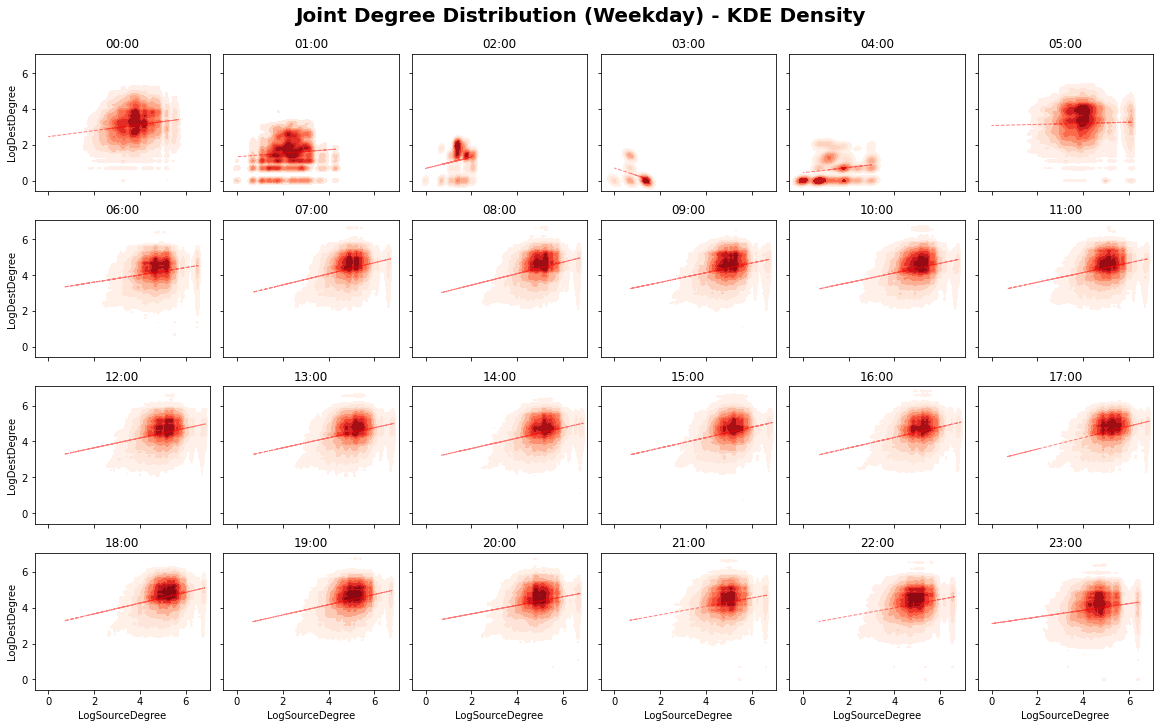

In [73]:
from scipy.stats import kde

fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Joint Degree Distribution (Weekday) - KDE Density',fontweight="bold", size=20)

for day_hour in weekday_joint_degree_dist_df.keys():
    
    i = day_hour%6
    j = int(day_hour/6)
    
    hour_df = weekday_joint_degree_dist_df[day_hour]
    hour_df['LogSourceDegree'] = np.log(hour_df['SourceDegree'].replace(0, np.nan))
    hour_df['LogDestDegree'] = np.log(hour_df['DestDegree'].replace(0, np.nan))
    
    x = hour_df['LogSourceDegree']
    y = hour_df['LogDestDegree']
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)(x)
    axes[j][i].plot(x, p,"r--", lw=1, alpha=0.5)
    
    axes[j][i].set_title("{}:00".format(str(day_hour).zfill(2)), fontweight=10)
    
      
    sns.kdeplot(x=x, y=y, cmap="Reds", shade=True, bw_adjust=.5, ax=axes[j][i])
    
plt.show()

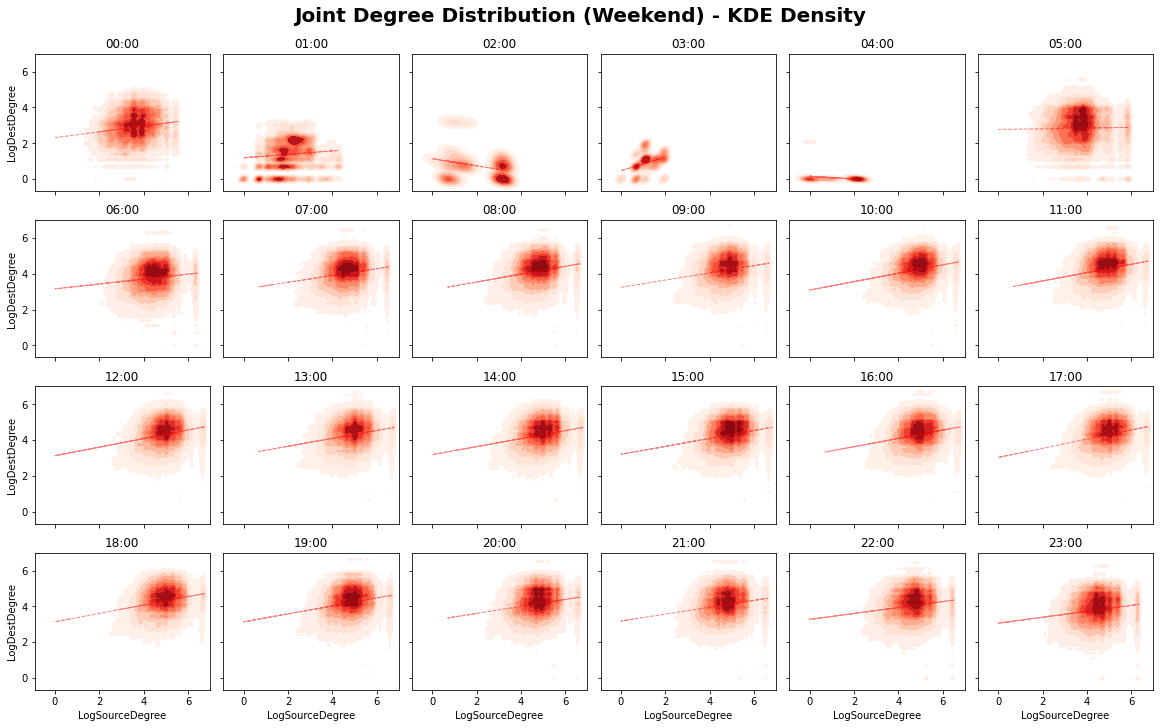

In [74]:
fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Joint Degree Distribution (Weekend) - KDE Density',fontweight="bold", size=20)

for day_hour in weekend_joint_degree_dist_df.keys():
    
    i = day_hour%6
    j = int(day_hour/6)
    
    hour_df = weekend_joint_degree_dist_df[day_hour]
    hour_df['LogSourceDegree'] = np.log(hour_df['SourceDegree'].replace(0, np.nan))
    hour_df['LogDestDegree'] = np.log(hour_df['DestDegree'].replace(0, np.nan))
    
    x = hour_df['LogSourceDegree']
    y = hour_df['LogDestDegree']
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)(x)
    axes[j][i].plot(x, p,"r--", lw=1, alpha=0.5)
    
    axes[j][i].set_title("{}:00".format(str(day_hour).zfill(2)), fontweight=10)
    
      
    sns.kdeplot(x=x, y=y, cmap="Reds", shade=True, bw_adjust=.5, ax=axes[j][i])
    
plt.show()

ModuleNotFoundError: No module named 'plotly'